In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/계량/BM_인공위성.csv')
df.columns = ['date', 'BM_price', 'BM_month_rate', 'Int_price' , 'Int_rate', 'BA_price',
              'BA_rate', 'LMT_price', 'LMT_rate', 'PPA_ETF_price', 'PPA_ETF_rate',
              'UFO_ETF_price', 'UFO_ETF_rate']
df.head()

,date,BM_price,BM_month_rate,Int_price,Int_rate,BA_price,BA_rate,LMT_price,LMT_rate,PPA_ETF_price,PPA_ETF_rate,UFO_ETF_price,UFO_ETF_rate
0,2020.11.1,37303,0.116475,30060,0.469234,210.71,0.015774,365.00,-0.027836,65.01,0.043053,24.68,0.032293
1,2020.12.1,41911,0.075814,48059,0.390011,214.06,-0.097419,354.98,-0.098069,67.87,-0.049380,25.49,0.066767
2,2021.1.1,45212,-0.122758,70983,0.076144,194.19,0.087796,321.82,0.025858,64.60,0.039310,27.25,0.065685
3,2021.2.1,39989,0.004292,76599,-0.219547,212.01,0.183531,330.25,0.112301,67.19,0.079230,29.10,-0.019782
4,2021.3.1,40161,0.104770,61500,-0.019639,254.72,-0.083520,369.50,0.029493,72.73,0.031267,28.53,0.040191


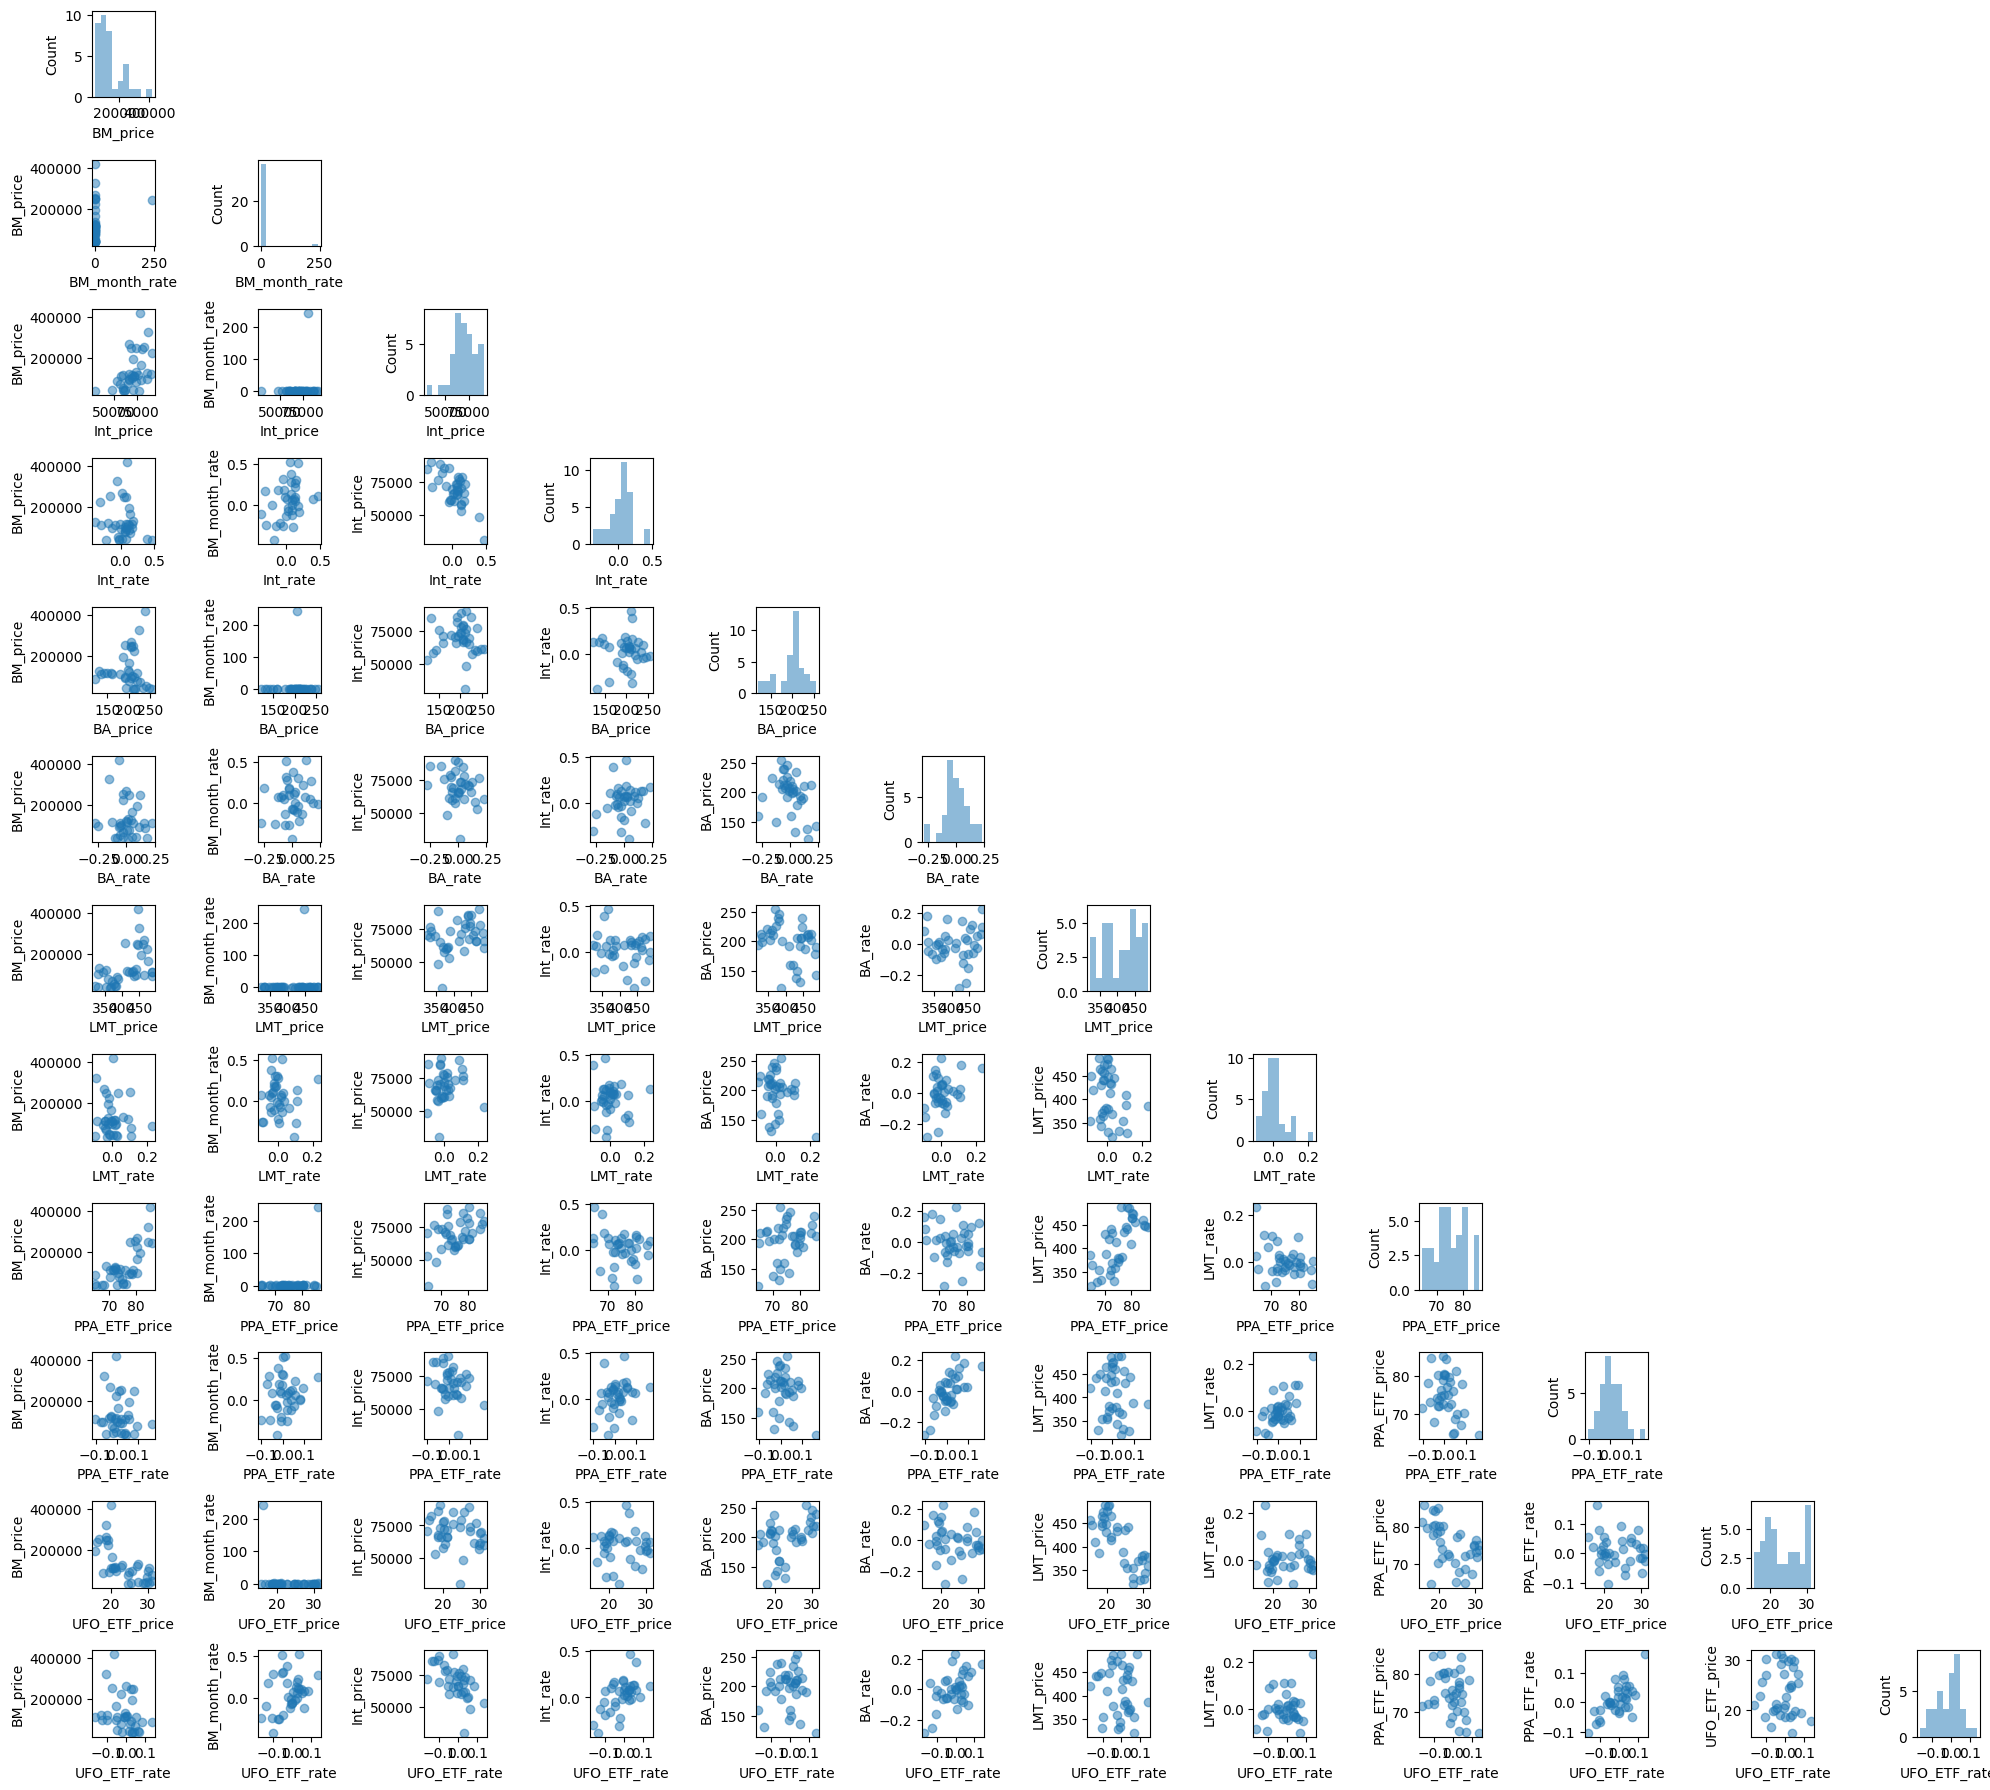

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['BM_price', 'BM_month_rate', 'Int_price' , 'Int_rate', 'BA_price',
              'BA_rate', 'LMT_price', 'LMT_rate', 'PPA_ETF_price', 'PPA_ETF_rate',
              'UFO_ETF_price', 'UFO_ETF_rate']
scatterplotmatrix(df[cols].values, figsize=(20,18), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

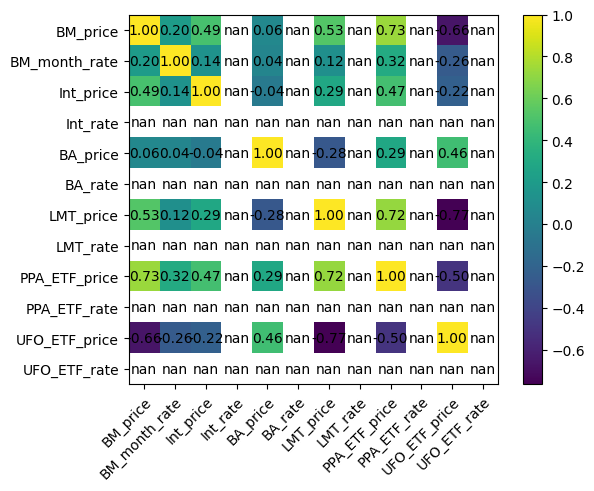

In [ ]:
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.utils import shuffle
# Gradient Descent

class LinearRegressionGD(object):

  def __init__(self, eta=0.0001, n_iter=20):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])

  def predict(self, X):
    return self.net_input(X)

In [ ]:
X = df['BM_price'].values
y = df['PPA_ETF_price'].values
X = X.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_x.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

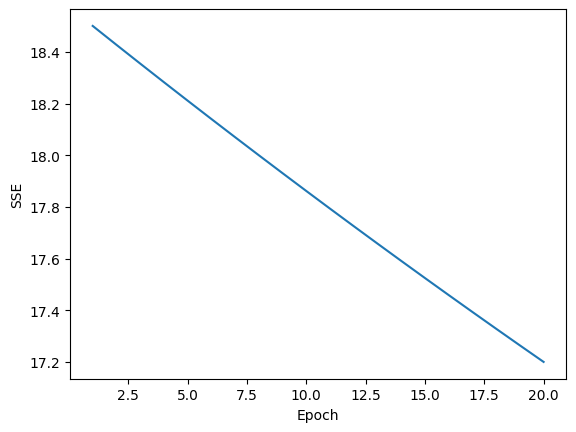

In [ ]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout
plt.show()

In [ ]:
def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)
  return None

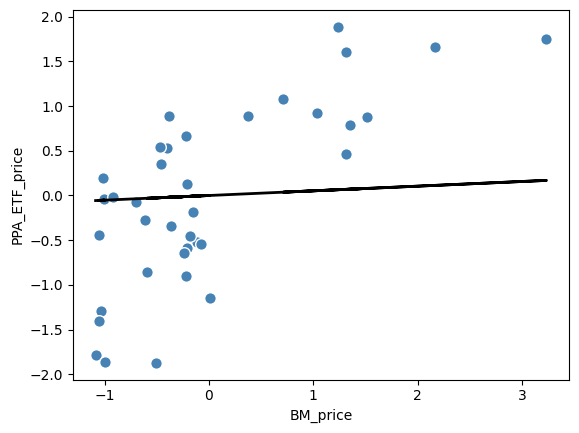

In [ ]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('BM_price')
plt.ylabel('PPA_ETF_price')
plt.show()